# Graph

What is a Graph as a Data Structure?

In computer science, a Graph is a non-linear data structure consisting of a set of nodes (also called vertices) and a set of edges that connect these nodes. The edges represent relationships or connections between the nodes.

Key Concepts of Graphs:

* Nodes (Vertices): These are the entities or items in the graph. In our social network example, people would be nodes. In a map, cities would be nodes.
* Edges: These represent the connections or relationships between nodes. In the social network, a friendship between two people would be an edge. On a map, a road connecting two cities would be an edge.
* Directed vs. Undirected:
  * Undirected Graph: Edges have no direction. If there's an edge between node A and node B, it means A is related to B, and B is related to A (like mutual friendship).
  * Directed Graph: Edges have a direction. An edge from node A to node B means A is related to B, but not necessarily the other way around (like following someone on social media).
* Weighted vs. Unweighted:
  * Unweighted Graph: Edges have no value associated with them, just representing a connection.
  * Weighted Graph: Each edge has a weight or cost associated with it (e.g., the distance between two cities on a map, the strength of a friendship in a social network).

Representing Graphs in Python:

There are several common ways to represent graphs in Python:

* Adjacency Matrix: A 2D array (or a list of lists) where the rows and columns represent the nodes. An entry at matrix[i][j] indicates whether there is an edge between node i and node j. The value of the entry can be 1 (for an unweighted graph) or the weight of the edge (for a weighted graph). For undirected graphs, the matrix is symmetric.
* Adjacency List: A dictionary where the keys represent the nodes, and the value for each key is a list (or set) of its neighboring nodes (the nodes it has a direct edge to). For weighted graphs, the list might contain tuples of (neighbor, weight).

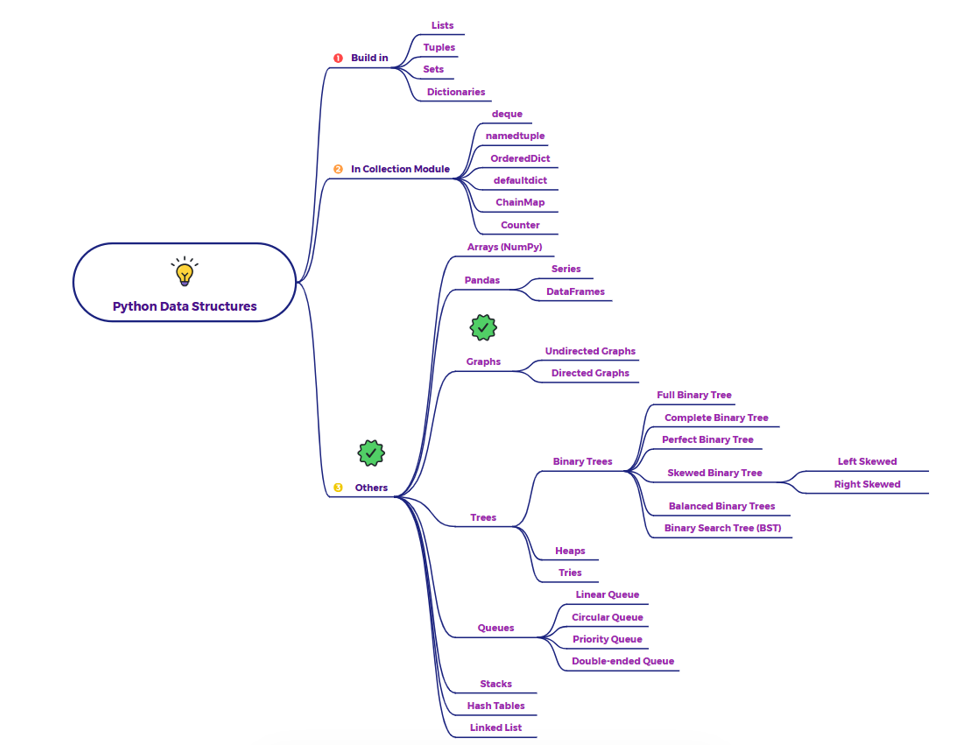


# 1. Define a Utility function to print highlighted characteristics

In [139]:
import collections

def highlight_characteristic(name, description, symbol='='):
    """Helper function to print highlighted highlighted_characteristics."""
    print(f"\n{symbol*5} {name.upper()} {symbol*5}")
    print(description)
    print(f"{symbol*5} {name.upper()} {symbol*5}\n")

print("--- Python Graph Data Structure: Flight Network Example ---")

--- Python Graph Data Structure: Flight Network Example ---


# Define the Graph

This Python code defines a Graph class that implements a graph data structure using an adjacency list. It's designed to handle both directed and undirected graphs, as well as weighted and unweighted edges. The class allows you to add nodes (vertices) and connect them with edges, where each edge can optionally have a numerical weight. You can then retrieve a node's neighbors and get a string representation of the entire graph, making it a flexible tool for representing and working with network-like data.

In [140]:
class Graph:
    """
    A class to represent a Graph, supporting both directed/undirected
    and weighted/unweighted edges.
    Implemented using an Adjacency List.
    """
    def __init__(self, directed=False):
        self.graph = collections.defaultdict(list)
        self.directed = directed
        self.nodes = set() # To keep track of all unique nodes (vertices)

    def add_node(self, node):
        """
        Adds a new node (vertex) to the graph.
        Nodes are automatically added when an edge is added, but this allows adding isolated nodes.
        """
        self.nodes.add(node)
        if node not in self.graph:
            self.graph[node] = [] # Ensure node exists in adjacency list even if no edges yet

    def add_edge(self, node1, node2, weight=1):
        """
        Adds an edge between node1 and node2.
        For unweighted graphs, weight defaults to 1.
        For undirected graphs, an edge is added in both directions.
        """
        self.nodes.add(node1)
        self.nodes.add(node2)

        # Ensure nodes exist in the graph dictionary
        if node1 not in self.graph:
            self.graph[node1] = []
        if node2 not in self.graph:
            self.graph[node2] = []

        self.graph[node1].append((node2, weight))
        if not self.directed:
            self.graph[node2].append((node1, weight)) # Add reverse edge for undirected graph

    def get_neighbors(self, node):
        """Returns a list of (neighbor, weight) tuples for a given node."""
        return self.graph.get(node, [])

    def get_all_nodes(self):
        """Returns a sorted list of all nodes in the graph."""
        return sorted(list(self.nodes))

    def __str__(self):
        """Provides a string representation of the graph."""
        s = "Graph Structure:\n"
        s += f"  Type: {'Directed' if self.directed else 'Undirected'}\n"
        for node, neighbors in self.graph.items():
            s += f"  {node}: "
            if neighbors:
                s += ", ".join([f"({n}, W={w})" if w != 1 else f"({n})" for n, w in neighbors])
            else:
                s += "[]"
            s += "\n"
        return s

# 2. Nodes (Vertices) & Edges:

* 'DEL', 'MUM', 'CCU', 'BLR' are our nodes (representing airports).
* flight_graph_unweighted.add_edge('DEL', 'MUM') creates an edge (representing a flight connection) between the Delhi and Mumbai nodes.
* The graph dictionary in the Graph class effectively stores these connections: keys are nodes, and values are lists of their connected neighbors.

In [141]:
# 1. Nodes (Vertices) & Edges Characteristic

highlight_characteristic(
    "Nodes (Vertices) & Edges",
    "Nodes (or Vertices) are the fundamental entities in a graph. Edges represent connections or relationships between these nodes."
)

# Creating an Unweighted, Undirected Flight Network (simplistic connections)
print("--- Unweighted, Undirected Flight Network (Connections Only) ---")
flight_graph_unweighted = Graph(directed=False) # Undirected by default

# Adding nodes (airports)
flight_graph_unweighted.add_node('DEL') # Delhi
flight_graph_unweighted.add_node('MUM') # Mumbai
flight_graph_unweighted.add_node('CCU') # Kolkata
flight_graph_unweighted.add_node('BLR') # Bengaluru

# Adding edges (flights)
flight_graph_unweighted.add_edge('DEL', 'MUM')
flight_graph_unweighted.add_edge('MUM', 'BLR')
flight_graph_unweighted.add_edge('DEL', 'CCU')
flight_graph_unweighted.add_edge('BLR', 'CCU')

print(flight_graph_unweighted)
print(f"All Nodes: {flight_graph_unweighted.get_all_nodes()}")
print(f"Neighbors of MUM: {flight_graph_unweighted.get_neighbors('MUM')}")
print(f"Neighbors of BLR: {flight_graph_unweighted.get_neighbors('BLR')}")
print("Notice how 'MUM' is connected to 'DEL' and 'BLR', and 'BLR' is connected to 'MUM' and 'CCU'.")
print("Edges are implicitly bi-directional here (e.g., DEL-MUM implies MUM-DEL).\n")


===== NODES (VERTICES) & EDGES =====
Nodes (or Vertices) are the fundamental entities in a graph. Edges represent connections or relationships between these nodes.
===== NODES (VERTICES) & EDGES =====

--- Unweighted, Undirected Flight Network (Connections Only) ---
Graph Structure:
  Type: Undirected
  DEL: (MUM), (CCU)
  MUM: (DEL), (BLR)
  CCU: (DEL), (BLR)
  BLR: (MUM), (CCU)

All Nodes: ['BLR', 'CCU', 'DEL', 'MUM']
Neighbors of MUM: [('DEL', 1), ('BLR', 1)]
Neighbors of BLR: [('MUM', 1), ('CCU', 1)]
Notice how 'MUM' is connected to 'DEL' and 'BLR', and 'BLR' is connected to 'MUM' and 'CCU'.
Edges are implicitly bi-directional here (e.g., DEL-MUM implies MUM-DEL).



# 3. Directed vs. Undirected:

* Undirected Graph (flight_graph_unweighted, flight_graph_weighted_undirected): When directed=False is set during initialization, add_edge(node1, node2) automatically adds an edge from node1 to node2 and an edge from node2 to node1. This signifies a two-way connection (like a road that can be driven in both directions). The output for flight_graph_unweighted shows this symmetry.
* Directed Graph (flight_graph_directed): When directed=True is set, add_edge(node1, node2) only adds an edge from node1 to node2. There's no automatic reverse edge. The output clearly shows that DEL has a flight to MUM, but MUM does not appear as a neighbor of DEL without an explicit add_edge('MUM', 'DEL'). This represents one-way relationships (like following someone on social media, or a one-way street).

In [142]:
# 2. Directed vs. Undirected Characteristic

highlight_characteristic(
    "Directed vs. Undirected",
    "In a Directed graph, edges have a specific direction (e.g., A -> B means you can go from A to B, but not necessarily B to A). In an Undirected graph, edges are bi-directional (A - B implies you can go both ways)."
)

print("--- Directed Flight Network (One-Way Flights/Preferred Routes) ---")
flight_graph_directed = Graph(directed=True) # This graph is directed

flight_graph_directed.add_edge('DEL', 'MUM', weight=120) # Delhi to Mumbai (2 hr)
flight_graph_directed.add_edge('MUM', 'BLR', weight=90)  # Mumbai to Bengaluru (1.5 hr)
flight_graph_directed.add_edge('CCU', 'DEL', weight=150) # Kolkata to Delhi (2.5 hr)
flight_graph_directed.add_edge('BLR', 'CCU', weight=180) # Bengaluru to Kolkata (3 hr)

# Notice there's no direct return flight added for some
print(flight_graph_directed)
print(f"Neighbors (outgoing flights) from DEL: {flight_graph_directed.get_neighbors('DEL')}")
print(f"Neighbors (outgoing flights) from MUM: {flight_graph_directed.get_neighbors('MUM')}")
print(f"Neighbors (outgoing flights) from CCU: {flight_graph_directed.get_neighbors('CCU')}")
print("Notice that DEL has a flight to MUM, but MUM does NOT automatically have a flight back to DEL in this directed graph.")
print("CCU has a flight to DEL, but DEL does NOT have a flight to CCU initially.\n")


===== DIRECTED VS. UNDIRECTED =====
In a Directed graph, edges have a specific direction (e.g., A -> B means you can go from A to B, but not necessarily B to A). In an Undirected graph, edges are bi-directional (A - B implies you can go both ways).
===== DIRECTED VS. UNDIRECTED =====

--- Directed Flight Network (One-Way Flights/Preferred Routes) ---
Graph Structure:
  Type: Directed
  DEL: (MUM, W=120)
  MUM: (BLR, W=90)
  BLR: (CCU, W=180)
  CCU: (DEL, W=150)

Neighbors (outgoing flights) from DEL: [('MUM', 120)]
Neighbors (outgoing flights) from MUM: [('BLR', 90)]
Neighbors (outgoing flights) from CCU: [('DEL', 150)]
Notice that DEL has a flight to MUM, but MUM does NOT automatically have a flight back to DEL in this directed graph.
CCU has a flight to DEL, but DEL does NOT have a flight to CCU initially.



# 4. Weighted vs. Unweighted:

* Unweighted Graph (flight_graph_unweighted): Edges simply indicate connectivity. The weight parameter in add_edge defaults to 1, which is often used to represent unweighted connections or a unit cost. The __str__ method reflects this by not showing weights for unweighted edges.
* Weighted Graph (flight_graph_directed, flight_graph_weighted_undirected): When add_edge('DEL', 'MUM', weight=120) is used, 120 is the weight associated with that edge (e.g., representing 120 minutes of flight time). This weight can be used in algorithms (e.g., finding the shortest travel time path). The __str__ method and get_neighbors output display these weights.

In [143]:

# 3. Weighted vs. Unweighted Characteristic
highlight_characteristic(
    "Weighted vs. Unweighted",
    "Weighted graphs have values (weights) associated with their edges, representing cost, distance, time, capacity, etc. Unweighted graphs only indicate connectivity."
)

# The 'flight_graph_unweighted' was unweighted (implicitly weight=1)
# The 'flight_graph_directed' was weighted (weights representing flight duration in minutes)

print("--- Weighted, Undirected Flight Network (Flight Durations) ---")
flight_graph_weighted_undirected = Graph(directed=False)

flight_graph_weighted_undirected.add_edge('DEL', 'MUM', weight=120) # 2 hours
flight_graph_weighted_undirected.add_edge('MUM', 'BLR', weight=90)  # 1.5 hours
flight_graph_weighted_undirected.add_edge('DEL', 'CCU', weight=150) # 2.5 hours
flight_graph_weighted_undirected.add_edge('BLR', 'CCU', weight=180) # 3 hours
flight_graph_weighted_undirected.add_edge('MUM', 'CCU', weight=160) # 2.67 hours

print(flight_graph_weighted_undirected)
print(f"Neighbors of DEL (with weights): {flight_graph_weighted_undirected.get_neighbors('DEL')}")
print(f"Neighbors of MUM (with weights): {flight_graph_weighted_undirected.get_neighbors('MUM')}")
print("Here, the numbers next to the airport codes (e.g., 'W=120') represent the flight duration or cost.")
print("Because it's undirected, MUM->DEL has the same weight as DEL->MUM.\n")

# Example of finding a path (simple DFS/BFS concept)
print("--- Simple Path Finding Example (conceptual) ---")
def find_path(graph_obj, start, end, path=[]):
    path = path + [start]
    if start == end:
        return path
    if start not in graph_obj.graph:
        return None
    for neighbor, weight in graph_obj.get_neighbors(start):
        if neighbor not in path:
            new_path = find_path(graph_obj, neighbor, end, path)
            if new_path:
                return new_path
    return None

print(f"Path from DEL to BLR in undirected graph: {find_path(flight_graph_unweighted, 'DEL', 'BLR')}")
print(f"Path from CCU to MUM in weighted undirected graph: {find_path(flight_graph_weighted_undirected, 'CCU', 'MUM')}\n")


===== WEIGHTED VS. UNWEIGHTED =====
Weighted graphs have values (weights) associated with their edges, representing cost, distance, time, capacity, etc. Unweighted graphs only indicate connectivity.
===== WEIGHTED VS. UNWEIGHTED =====

--- Weighted, Undirected Flight Network (Flight Durations) ---
Graph Structure:
  Type: Undirected
  DEL: (MUM, W=120), (CCU, W=150)
  MUM: (DEL, W=120), (BLR, W=90), (CCU, W=160)
  BLR: (MUM, W=90), (CCU, W=180)
  CCU: (DEL, W=150), (BLR, W=180), (MUM, W=160)

Neighbors of DEL (with weights): [('MUM', 120), ('CCU', 150)]
Neighbors of MUM (with weights): [('DEL', 120), ('BLR', 90), ('CCU', 160)]
Here, the numbers next to the airport codes (e.g., 'W=120') represent the flight duration or cost.
Because it's undirected, MUM->DEL has the same weight as DEL->MUM.

--- Simple Path Finding Example (conceptual) ---
Path from DEL to BLR in undirected graph: ['DEL', 'MUM', 'BLR']
Path from CCU to MUM in weighted undirected graph: ['CCU', 'DEL', 'MUM']



# COMPLETED